In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

from japanmap import picture

In [2]:
prefecture_code = pd.read_csv("japan_housing_data/prefecture_code.csv")
prefecture_code.head()

,Code,JpName,EnName
0,1,北海道,Hokkaido
1,2,青森県,Aomori
2,3,岩手県,Iwate
3,4,宮城県,Miyagi
4,5,秋田県,Akita


In [3]:
df = pd.DataFrame()

data_dir = "japan_housing_data/trade_prices"

for f in os.listdir(data_dir):
    df_prefecture = pd.read_csv(os.path.join(data_dir, f), low_memory=False)
    df_prefecture["Code"] = int(f.split(".")[0])
    df = pd.concat([df, df_prefecture])

df.head()

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Code
0,1,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Aobadai,Moji,30-60minutes,30.0,...,4.0,Category I Exclusively Low-story Residential Zone,50.0,80.0,4th quarter 2017,2017,4,NaN,NaN,40
1,2,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Komorie,30-60minutes,30.0,...,4.0,Urbanization Control Area,NaN,NaN,1st quarter 2018,2018,1,NaN,NaN,40
2,3,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,4.0,Urbanization Control Area,NaN,NaN,4th quarter 2017,2017,4,NaN,NaN,40
3,4,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,35.0,Urbanization Control Area,70.0,200.0,4th quarter 2016,2016,4,NaN,NaN,40
4,5,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,NaN,Urbanization Control Area,70.0,200.0,3rd quarter 2016,2016,3,NaN,NaN,40


In [4]:
df = pd.merge(left=df, right=prefecture_code, left_on="Code", right_on="Code", how="left")
df.head()

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Code,JpName,EnName
0,1,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Aobadai,Moji,30-60minutes,30.0,...,50.0,80.0,4th quarter 2017,2017,4,NaN,NaN,40,福岡県,Fukuoka
1,2,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Komorie,30-60minutes,30.0,...,NaN,NaN,1st quarter 2018,2018,1,NaN,NaN,40,福岡県,Fukuoka
2,3,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,NaN,NaN,4th quarter 2017,2017,4,NaN,NaN,40,福岡県,Fukuoka
3,4,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,70.0,200.0,4th quarter 2016,2016,4,NaN,NaN,40,福岡県,Fukuoka
4,5,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,70.0,200.0,3rd quarter 2016,2016,3,NaN,NaN,40,福岡県,Fukuoka


In [5]:
df.columns

Index(['No', 'Type', 'Region', 'MunicipalityCode', 'Prefecture',
       'Municipality', 'DistrictName', 'NearestStation',
       'TimeToNearestStation', 'MinTimeToNearestStation',
       'MaxTimeToNearestStation', 'TradePrice', 'FloorPlan', 'Area',
       'AreaIsGreaterFlag', 'UnitPrice', 'PricePerTsubo', 'LandShape',
       'Frontage', 'FrontageIsGreaterFlag', 'TotalFloorArea',
       'TotalFloorAreaIsGreaterFlag', 'BuildingYear', 'PrewarBuilding',
       'Structure', 'Use', 'Purpose', 'Direction', 'Classification', 'Breadth',
       'CityPlanning', 'CoverageRatio', 'FloorAreaRatio', 'Period', 'Year',
       'Quarter', 'Renovation', 'Remarks', 'Code', 'JpName', 'EnName'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906518 entries, 0 to 3906517
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   No                           int64  
 1   Type                         object 
 2   Region                       object 
 3   MunicipalityCode             int64  
 4   Prefecture                   object 
 5   Municipality                 object 
 6   DistrictName                 object 
 7   NearestStation               object 
 8   TimeToNearestStation         object 
 9   MinTimeToNearestStation      float64
 10  MaxTimeToNearestStation      float64
 11  TradePrice                   int64  
 12  FloorPlan                    object 
 13  Area                         int64  
 14  AreaIsGreaterFlag            int64  
 15  UnitPrice                    float64
 16  PricePerTsubo                float64
 17  LandShape                    object 
 18  Frontage                     float64
 19  

In [7]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))  

,No,MunicipalityCode,MinTimeToNearestStation,MaxTimeToNearestStation,TradePrice,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,Frontage,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter,Code
count,3906518.0,3906518.0,3315977.0,3228071.0,3906518.0,3906518.0,3906518.0,1384415.0,1384415.0,2537063.0,1317660.0,3906518.0,1869804.0,3906518.0,2685837.0,3191877.0,3191877.0,3906518.0,3906518.0,3906518.0
mean,78354.1,20467.1,22.6,27.4,27605894.6,467.4,0.0,85148.9,281406.5,14.6,175.2,0.0,1995.5,0.0,6.8,61.0,209.0,2012.9,2.5,20.3
std,80173.6,12175.5,23.1,27.7,141745961.4,847.7,0.2,168683.2,557031.6,9.8,256.4,0.1,15.2,0.0,4.6,10.0,107.5,3.7,1.1,12.2
min,1.0,1101.0,0.0,0.0,100.0,10.0,0.0,1.0,2.0,0.1,10.0,0.0,1945.0,0.0,1.0,30.0,50.0,2005.0,1.0,1.0
25%,20780.0,12204.0,9.0,8.0,5000000.0,100.0,0.0,16000.0,55000.0,8.5,95.0,0.0,1984.0,0.0,4.0,60.0,200.0,2010.0,2.0,12.0
50%,48159.0,17210.0,16.0,15.0,14000000.0,185.0,0.0,40000.0,130000.0,12.0,105.0,0.0,1996.0,0.0,6.0,60.0,200.0,2013.0,3.0,17.0
75%,114733.0,28110.0,30.0,29.0,29000000.0,370.0,0.0,91000.0,300000.0,17.0,140.0,0.0,2009.0,0.0,7.0,60.0,200.0,2016.0,4.0,28.0
max,406575.0,47382.0,120.0,120.0,61000000000.0,5000.0,1.0,20000000.0,66000000.0,50.0,2000.0,1.0,2020.0,1.0,99.9,80.0,1300.0,2019.0,4.0,47.0


In [8]:
df['EnName'] = df['EnName'].apply(lambda x: x.rstrip())

In [9]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("Missing percentage\n")
print(missing_percentage)

Missing percentage

Remarks                        94.064791
Renovation                     85.578052
FloorPlan                      84.713497
Purpose                        69.722960
TotalFloorArea                 66.270218
PricePerTsubo                  64.561407
UnitPrice                      64.561407
BuildingYear                   52.136301
Use                            51.709579
Structure                      51.041490
Frontage                       35.055643
Breadth                        31.247290
Classification                 30.514719
Direction                      28.901646
LandShape                      28.862788
Region                         28.595209
FloorAreaRatio                 18.293555
CoverageRatio                  18.293555
MaxTimeToNearestStation        17.367052
MinTimeToNearestStation        15.116812
TimeToNearestStation           15.116812
NearestStation                 14.483768
CityPlanning                   13.584118
DistrictName                    0.211

In [10]:
df['MunicipalityCode'] = df['MunicipalityCode'].astype(str)

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna('unkown', inplace=True)

In [12]:
df_copy = df.copy()

In [13]:
chubu_prefectures = [
    'Ibaraki', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 
    'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi'
]
chubu_df = df_copy[df_copy['EnName'].isin(chubu_prefectures)]
# tohoku_df = df_copy[(df_copy['Code'] >= 2) & (df_copy['Code'] <= 7)]

In [14]:
split_index = int(len(chubu_df) * 0.85)

chubu_df = chubu_df.sort_values(by=['Year', 'Quarter'])

In [16]:
chubu_df[["Year", "Quarter"]].head(100050)

,Year,Quarter
627989,2005,3
628004,2005,3
628006,2005,3
628011,2005,3
628119,2005,3
...,...,...
2302845,2008,3
2302854,2008,3
2302856,2008,3
2302861,2008,3


In [17]:
train_df = chubu_df.iloc[:split_index]
test_df = chubu_df.iloc[split_index:]

In [18]:
print(test_df[['Year', 'Quarter']].head(100000))

         Year  Quarter
2244596  2017        3
2244597  2017        3
2244598  2017        3
2244599  2017        3
2244600  2017        3
...       ...      ...
827790   2019        2
827856   2019        2
827857   2019        2
828269   2019        2
828272   2019        2

[100000 rows x 2 columns]


In [19]:
def cap_outliers(series, lower_percentile=0.01, upper_percentile=0.99):
    lower = series.quantile(lower_percentile)
    upper = series.quantile(upper_percentile)
    return np.clip(series, lower, upper)

In [20]:
chubu_df.head()

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Code,JpName,EnName
627989,162627,Residential Land(Land Only),Residential Area,23101,Aichi Prefecture,"Chikusa Ward,Nagoya City",Ikegamicho,Motoyama (Aichi),14,14.0,...,40.0,100.0,3rd quarter 2005,2005,3,unkown,unkown,23,愛知県,Aichi
628004,162642,Residential Land(Land and Building),Commercial Area,23101,Aichi Prefecture,"Chikusa Ward,Nagoya City",Ikeshitacho,Ikeshita,3,3.0,...,80.0,300.0,3rd quarter 2005,2005,3,unkown,unkown,23,愛知県,Aichi
628006,162644,Residential Land(Land Only),Residential Area,23101,Aichi Prefecture,"Chikusa Ward,Nagoya City",Ikesonocho,Motoyama (Aichi),6,6.0,...,50.0,150.0,3rd quarter 2005,2005,3,unkown,unkown,23,愛知県,Aichi
628011,162649,"Pre-owned Condominiums, etc.",unkown,23101,Aichi Prefecture,"Chikusa Ward,Nagoya City",Itakacho Oaza Inokoishi,Chayagasaka,5,5.0,...,80.0,300.0,3rd quarter 2005,2005,3,Not yet,unkown,23,愛知県,Aichi
628119,162757,"Pre-owned Condominiums, etc.",unkown,23101,Aichi Prefecture,"Chikusa Ward,Nagoya City",Imaike,Imaike (Aichi),3,3.0,...,80.0,500.0,3rd quarter 2005,2005,3,Done,unkown,23,愛知県,Aichi


In [21]:
columns_to_cap = ["Area", "TotalFloorArea","FloorAreaRatio"]
for col in columns_to_cap:    
    train_df[col] = cap_outliers(train_df[col])

In [22]:
missing_numerical = train_df.select_dtypes(include=['float64', 'int64']).isna().sum().sort_values(ascending=False)
missing_percentage = (train_df.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100).sort_values(ascending=False)
print("Missing values in numerical variables:")
print(missing_numerical[missing_numerical > 0])
print("\n")
print(missing_percentage[missing_numerical > 0])

Missing values in numerical variables:
TotalFloorArea             459882
BuildingYear               428018
UnitPrice                  334997
PricePerTsubo              334997
Frontage                   168281
Breadth                    147444
FloorAreaRatio             121148
CoverageRatio              121148
MaxTimeToNearestStation    117478
MinTimeToNearestStation     91877
dtype: int64


TotalFloorArea             70.646412
BuildingYear               65.751510
UnitPrice                  51.461757
PricePerTsubo              51.461757
Frontage                   25.851085
Breadth                    22.650135
FloorAreaRatio             18.610582
CoverageRatio              18.610582
MaxTimeToNearestStation    18.046801
MinTimeToNearestStation    14.114013
dtype: float64


In [23]:
columns_to_drop = ['JpName', 'DistrictName', 'UnitPrice','PricePerTsubo', 'No', 
                   'TimeToNearestStation', 'TotalFloorAreaIsGreaterFlag', 'NearestStation', 
                   'Period', 'Year', 'Municipality', 'EnName', 'Prefecture', 
                   'AreaIsGreaterFlag', 'Quarter', 'FrontageIsGreaterFlag'
                   ]
train_df = train_df.drop(columns= columns_to_drop)
test_df = test_df.drop(columns= columns_to_drop)

In [24]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

numerical_columns = train_df.select_dtypes(include=['number']).columns
train_df_mean = train_df.copy()
test_df_mean = test_df.copy()
train_df_mean[numerical_columns] = imp_mean.fit_transform(train_df_mean[numerical_columns])
test_df_mean[numerical_columns] = imp_mean.transform(test_df_mean[numerical_columns])
print(test_df_mean[numerical_columns])


         MinTimeToNearestStation  MaxTimeToNearestStation  TradePrice    Area  \
2244596                29.567866                36.486799    280000.0  1800.0   
2244597                29.567866                36.486799    300000.0  2000.0   
2244598                29.567866                36.486799    190000.0  1300.0   
2244599                29.567866                36.486799     74000.0   510.0   
2244600                29.567866                36.486799    180000.0  1200.0   
...                          ...                      ...         ...     ...   
2267166                29.567866                36.486799   1600000.0  5000.0   
2267167                29.567866                36.486799     13000.0   550.0   
2267176                29.567866                36.486799    460000.0  5000.0   
2267457                19.000000                19.000000    350000.0    70.0   
2267462                23.000000                23.000000    900000.0   190.0   

          Frontage  TotalFl

In [25]:
X_train = train_df_mean.drop(columns=["TradePrice"])
y_train = train_df_mean["TradePrice"]
X_test = test_df_mean.drop(columns=["TradePrice"])
y_test = test_df_mean["TradePrice"]

In [26]:
print("Training data shape: ", X_train.shape, y_train.shape)
print("Test data shape: ", X_test.shape, y_test.shape)

Training data shape:  (650963, 24) (650963,)
Test data shape:  (114876, 24) (114876,)


In [27]:
missing_numerical = X_train.select_dtypes(include=['float64', 'int64']).isna().sum().sort_values(ascending=False)
missing_percentage = (X_train.select_dtypes(include=['float64', 'int64']).isnull().mean() * 100).sort_values(ascending=False)
print("Missing values in numerical variables:")
print(missing_numerical[missing_numerical > 0])
print("\n")
print(missing_percentage[missing_numerical > 0])

Missing values in numerical variables:
Series([], dtype: int64)


Series([], dtype: float64)


R-squared: 0.3931

Feature Importances:
                    Feature  Importance
13                      Use    0.115114
9            TotalFloorArea    0.114707
17                  Breadth    0.082110
2          MunicipalityCode    0.078987
10             BuildingYear    0.071480
6                      Area    0.068186
8                  Frontage    0.053202
4   MaxTimeToNearestStation    0.052893
3   MinTimeToNearestStation    0.047582
20           FloorAreaRatio    0.046393
15                Direction    0.044234
23                     Code    0.040310
18             CityPlanning    0.037314
16           Classification    0.027210
7                 LandShape    0.025947
22                  Remarks    0.021815
1                    Region    0.021779
12                Structure    0.020784
19            CoverageRatio    0.014096
14                  Purpose    0.012458
0                      Type    0.003193
11           PrewarBuilding    0.000146
5                 FloorPlan    0.000037


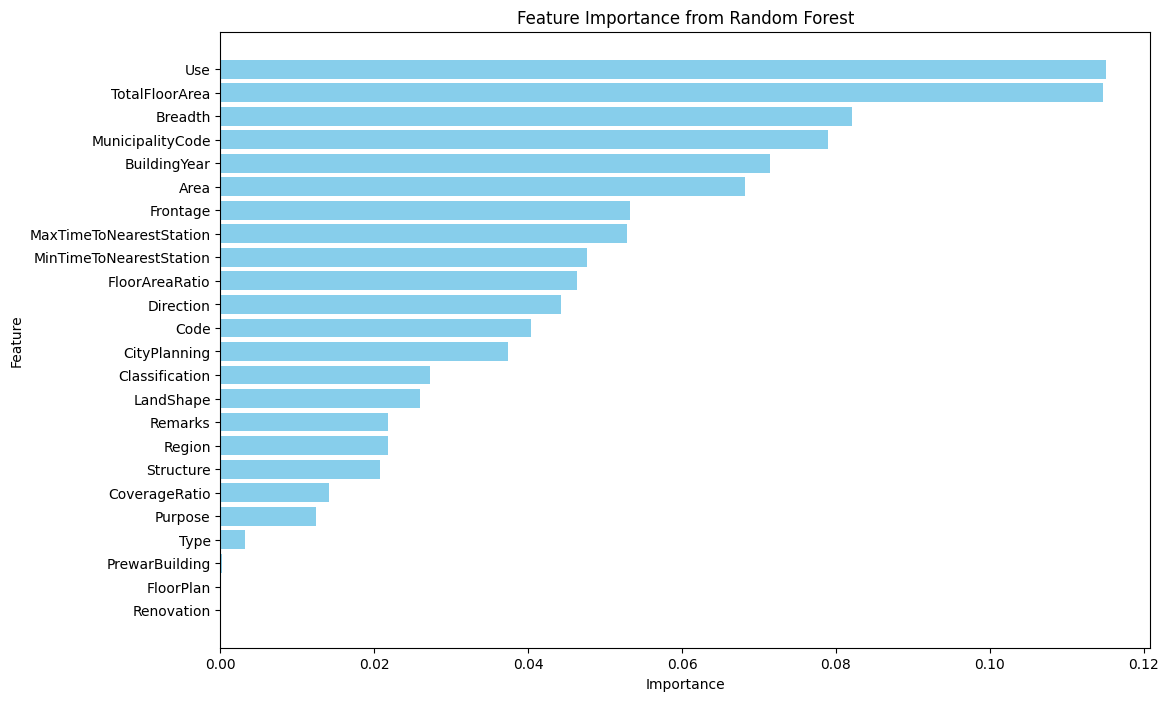

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

categorical_cols = X_train.select_dtypes(include=['object']).columns


label_encoders = {}  
if not categorical_cols.empty:
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        label_encoders[col] = le  

        test_values = X_test[col].unique()
        train_values = le.classes_

        unseen_labels = set(test_values) - set(train_values)
        le.classes_ = np.append(le.classes_, list(unseen_labels))

        X_test[col] = le.transform(X_test[col])

assert X_train.select_dtypes(include=['object']).empty, "X_train still has non-numeric columns!"
assert X_test.select_dtypes(include=['object']).empty, "X_test still has non-numeric columns!"


rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred)

print(f"R-squared: {r2_rf:.4f}")

importances = rf_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

## XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred_xgb = pipeline.predict(X_test)

r2_rf = r2_score(y_test, y_pred)

print(f"R-squared: {r2_rf:.4f}")

R-squared: 0.3931


In [30]:
top_12_features = importance_df.head(12)['Feature'].tolist()
print("Top 12 Features:", top_12_features)

Top 12 Features: ['Use', 'TotalFloorArea', 'Breadth', 'MunicipalityCode', 'BuildingYear', 'Area', 'Frontage', 'MaxTimeToNearestStation', 'MinTimeToNearestStation', 'FloorAreaRatio', 'Direction', 'Code']


In [31]:
relevant_features = top_12_features
X_train = X_train[relevant_features]
X_test = X_test[relevant_features]
X_test = X_test[relevant_features]

## Stacking Regressor

In [ ]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

print(X_train.shape, y_train.shape)

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

base_models = [
    ('linear', LinearRegression(n_jobs=-1)),          
    ('gb', GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42)),
    ('xgboost', XGBRegressor(n_estimators=70, learning_rate=0.1, random_state=42))
]

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(n_jobs=-1),
    n_jobs=-1,  
    passthrough=False  
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])
pipeline.fit(X_train, y_train)

y_pred_ensemble = pipeline.predict(X_test)

r2_rf = r2_score(y_test, y_pred)

print(f"R-squared: {r2_rf:.4f}")


(650963, 12) (650963,)
R-squared: 0.3931


In [ ]:
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from xgboost import XGBRegressor

print(X_train.shape, y_train.shape)

categorical_cols = X_train.select_dtypes(include=['object']).columns
numerical_columns = X_train.select_dtypes(include=['number']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_cols)
    ],
    remainder='passthrough'
)

base_models = [
    ('linear', LinearRegression(n_jobs=-1)),          
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)),
    ('xgboost', XGBRegressor(n_estimators=70, learning_rate=0.1, random_state=42))
]

stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression(n_jobs=-1),
    n_jobs=-1,  
    passthrough=False  
)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])
pipeline.fit(X_train, y_train)

y_pred_ensemble = pipeline.predict(X_test)

r2_rf = r2_score(y_test, y_pred)

print("\nEnsemble Model Performance:")
print(f"R-squared: {r2_rf:.4f}")


(650963, 12) (650963,)

Ensemble Model Performance:
R-squared: 0.3931
